In [1]:
# The code performs logistic/softmax regression on the MNIST Dataset
# It is based upon the tutorial given at Tensorflow.org : https://www.tensorflow.org/get_started/mnist/beginners
# We have added few Tensorboard summaries to understand it better

# Import Modules needed
import tensorflow as tf
import matplotlib.pyplot as plt,  matplotlib.image as mpimg
%matplotlib inline

# Import Input 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# Define Hyper Parameters of the model:
learning_rate = 0.05
batch_size = 100
max_epochs = 100

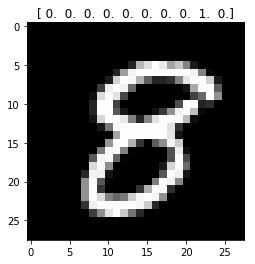

In [3]:
# Visualize the data
i = 55
img = mnist.train.images[i]
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(mnist.train.labels[i])

In [4]:
# Tensorflow graph inputs
x = tf.placeholder(tf.float32, [None, 784], name='X')
y = tf.placeholder(tf.float32, [None, 10],name='Y')

In [5]:
# Learning Variables
W = tf.Variable(tf.zeros([784, 10]), name='W')
b = tf.Variable(tf.zeros([10]), name='b')


In [6]:
# Define the model
with tf.name_scope("wx_b") as scope:
    y_hat = tf.nn.softmax(tf.matmul(x,W) + b)

In [7]:
#Add summary ops to collect data while training
w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("biases", b)

In [8]:
# Define the cross-entropy loss function
with tf.name_scope('cross-entropy') as scope:
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_hat))
    tf.summary.scalar('cross-entropy', loss)
    

In [9]:
# Choose the optimizer
with tf.name_scope('Train') as scope:
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [10]:
# Define ops to test trained model
correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [11]:
# Initializing the variables
init = tf.global_variables_initializer()


In [12]:
# Merge All summaries
merged_summary_op = tf.summary.merge_all()

In [13]:
with tf.Session() as sess:
    sess.run(init)  # initialize all variables
    summary_writer = tf.summary.FileWriter('graphs', sess.graph)  # Create an event file
    
    # Training
    for epoch in range(max_epochs):
        loss_avg = 0
        num_of_batch = int(mnist.train.num_examples/batch_size)
        for i in range(num_of_batch):
            batch_xs, batch_ys = mnist.train.next_batch(100)  # get the next batch of data
            _, l, summary_str = sess.run([optimizer,loss, merged_summary_op], feed_dict={x: batch_xs, y: batch_ys})  # Run the optimizer
            loss_avg += l
            summary_writer.add_summary(summary_str, epoch*num_of_batch + i)  # Add all summaries per batch
            
        loss_avg = loss_avg/num_of_batch
        print('Epoch {0}: Loss {1}'.format(epoch, loss_avg))
    
    print('Done')
    
    print(sess.run(accuracy, feed_dict={x: mnist.test.images,y: mnist.test.labels}))
    

    

Epoch 0: Loss 2.250637441548434
Epoch 1: Loss 2.0909123147617685
Epoch 2: Loss 1.961304726817391
Epoch 3: Loss 1.8826904947107488
Epoch 4: Loss 1.8332543024149808
Epoch 5: Loss 1.8014142487265847
Epoch 6: Loss 1.7794645149057562
Epoch 7: Loss 1.7633150293610313
Epoch 8: Loss 1.750868919545954
Epoch 9: Loss 1.7409239610758696
Epoch 10: Loss 1.7327635704387319
Epoch 11: Loss 1.7259209247068925
Epoch 12: Loss 1.7200765184922653
Epoch 13: Loss 1.7150074254382741
Epoch 14: Loss 1.7105629732392051
Epoch 15: Loss 1.7066086411476136
Epoch 16: Loss 1.7030719780921937
Epoch 17: Loss 1.6998750695315274
Epoch 18: Loss 1.6969586805863814
Epoch 19: Loss 1.6942723577672785
Epoch 20: Loss 1.6917831217158925
Epoch 21: Loss 1.6894430344755
Epoch 22: Loss 1.6871924673427234
Epoch 23: Loss 1.6849619973789562
Epoch 24: Loss 1.6825617228854786
Epoch 25: Loss 1.679472615068609
Epoch 26: Loss 1.6742813853784042
Epoch 27: Loss 1.6670515164462003
Epoch 28: Loss 1.6613866899230263
Epoch 29: Loss 1.65675790266557